# Pretatamiento de datos
### Conversion de variables categoricas a numericas


In [36]:
import pandas as pd

df = pd.read_csv('Titanic.csv')

In [37]:
# Sacamos datos que no afectaron la chance de sobrevivir
df = df.drop(['PassengerId', 'Name', 'Ticket','Fare','Embarked'], axis=1)

# Rellena valores faltantes de edad
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Convertimos variables categóricas en numéricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Ponemos la letra de la cabina (ejemplo: C de C85)
df['Cabin'] = df['Cabin'].fillna('Unknown')  # Rellenar NaN con 'Unknown'
df['Cabin'] = df['Cabin'].str[0]  # Primera letra
df['Cabin'] = df['Cabin'].map({c: i for i, c in enumerate(df['Cabin'].unique())})  # Codificar como numérico

# Las 3 columnas restantes son clase, familiares y padres-hijos abordo juntos. Estas ya estan en forma numerica y no requieren modificación

# Prueba de valores nulos
#print(df.isnull().sum())  # Deberia imprimir 0 en todas las columnas

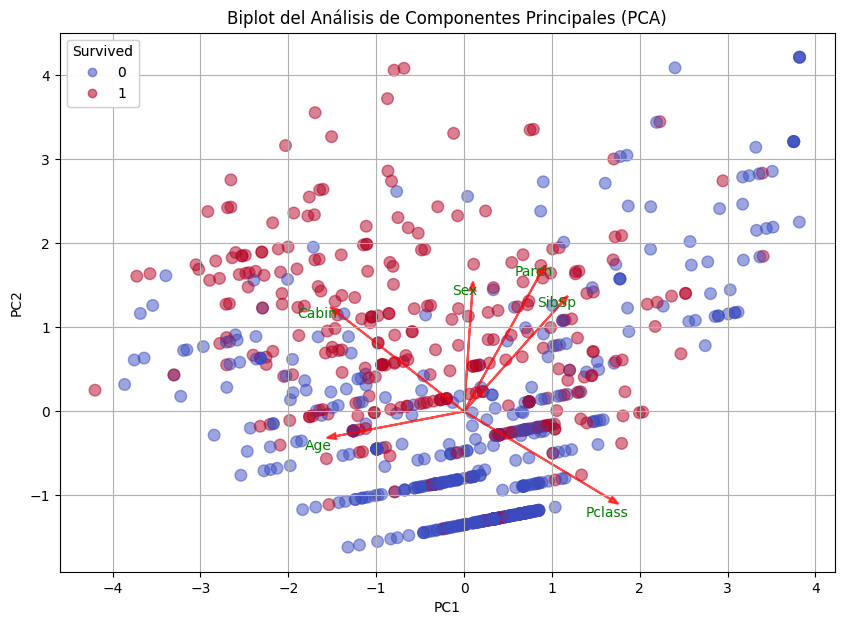

In [38]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from adjustText import adjust_text 

# Separar características y variable objetivo
X = df.drop('Survived', axis=1)

# Escalamiento estándar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 7))
    
    # Scatter plot con mayor transparencia
    xs, ys = score[:, 0], score[:, 1]
    scatter = plt.scatter(xs, ys, c=df['Survived'], cmap='coolwarm', s=70, alpha=0.5, marker='o')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Dibujar vectores de características con bastante escala y grosor
    texts = []
    for i, (x, y) in enumerate(coeff.T):
        plt.arrow(0, 0, x * 3, y * 3, color='r', alpha=0.7, head_width=0.07, linewidth=1.5)
        
        # Añadir texto un poco corrido
        if labels is None:
            texts.append(plt.text(x * 3.2, y * 3.2, f"Var{i+1}", color='g', ha='center', va='center'))
        else:
            texts.append(plt.text(x * 3.2, y * 3.2, labels[i], color='g', ha='center', va='center'))

    # Mover texto para que no se tapen
    adjust_text(texts)

    # Añadir leyenda para Survived
    legend1 = plt.legend(*scatter.legend_elements(), title="Survived")
    plt.gca().add_artist(legend1)

biplot(pca_result, pca.components_, labels=X.columns)
plt.title("Biplot del Análisis de Componentes Principales (PCA)")
plt.show()

